##### Import needed libraris

In [1]:
import pandas as pd #data processing
import numpy as np # linear algebra
import matplotlib as plt # plotting graphs 

###### First Task: Import data 

In [2]:
df=pd.read_csv("../Sales Analysis/SalesAnalysis.csv")

###### Exploring the data 

In [3]:
df.head() # displaying the first 5 (by default) rows of the data frame

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


###### Cleaning up the Data

In [4]:
df.isnull() # isnull() function detect missing values in the given series object

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
186845,False,False,False,False,False,False
186846,False,False,False,False,False,False
186847,False,False,False,False,False,False
186848,False,False,False,False,False,False


In [5]:
df=df.dropna(how='all') # dropping NAN rows which we'd like to refer to as not available values 
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
df=df[df["Order Date"].str[0:2]!='Or'] # getting rid of texting in order date column 

In [7]:
# Making columns correct type
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [8]:
# Adding month column
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


###### Adding City Column 

In [9]:
def get_city(Address):
    return address.split(",")[1].strip(" ")


def get_state(Address):
    return address.split(",")[2].split(" ")[1]



In [10]:
df['City'] = df['Purchase Address'] # we create a column that combines the city column and purchase address column into one column
df.head() 


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,"333 8th St, Los Angeles, CA 90001"


###### Exploring the Data

###### To begin the analysis part we will first need to answer some questions
### First question: What was the best month for sales? And how much was earned that month?


In [11]:
df["Sales"]=df["Quantity Ordered"].astype("int")*df["Price Each"].astype("int")

In [12]:
results=df.groupby(["Month"]).sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1813956
2,13449,2.188885e+06,2191696
3,17005,2.791208e+06,2794068
4,20558,3.367671e+06,3374951
5,18667,3.135125e+06,3138287
6,15253,2.562026e+06,2566187
7,16072,2.632540e+06,2635443
8,13448,2.230345e+06,2234194
9,13109,2.084992e+06,2087435


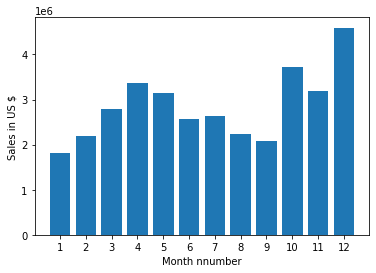

In [13]:
import matplotlib.pyplot as plt
months = range(1,13)

plt.bar(months,results["Sales"])
plt.xticks(months)
plt.ylabel("Sales in US $")
plt.xlabel("Month nnumber")
plt.show()

#### As we can see December has the highest sale rate due to the holiday season

### Second question: What city sold the most product?

In [14]:
df.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
"1 11th St, Atlanta, GA 30301",1,11.95,3,11
"1 11th St, Los Angeles, CA 90001",1,1700.00,10,1700
"1 11th St, San Francisco, CA 94016",1,700.00,9,700
"1 12th St, Los Angeles, CA 90001",1,150.00,3,150
"1 12th St, New York City, NY 10001",1,11.99,10,11
...,...,...,...,...
"999 Wilson St, Atlanta, GA 30301",1,99.99,9,99
"999 Wilson St, Los Angeles, CA 90001",1,999.99,9,999
"999 Wilson St, New York City, NY 10001",1,150.00,2,150


In [15]:
keys = [city for city,df in df.groupby(['City'])]


In [ ]:
plt.bar(keys,df.groupby(['City']).sum()['Sales'])

In [ ]:
plt.xlabel('Month number')
plt.show()

### Third  question  